# Companies Segmentation by  Clustering

# Importing The libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

#  Importing Data

In [17]:
df = pd.read_csv('companies.csv',sep=',',encoding= 'latin1')
display(df.head(5))

,Company,Sales,Profits,Assets,Market Value
0,ICBC,134.8,37.8,2813.5,237.3
1,China Construction Bank,113.1,30.6,2241.0,202.0
2,JPMorgan Chase,108.2,21.3,2359.1,191.4
3,General Electric,147.4,13.6,685.3,243.7
4,Exxon Mobil,420.7,44.9,333.8,400.4


# Dataset information

## Displaying rows and columns 

In [3]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 2010 rows and 5 columns


##  Displaying the column names

In [4]:
df.columns

Index(['Company', 'Sales', 'Profits', 'Assets', 'Market Value'], dtype='object')

## Datatypes of columns

In [5]:
df.dtypes

Company          object
Sales           float64
Profits         float64
Assets          float64
Market Value    float64
dtype: object

# Preprocessing the dataset

## Check for NULLS

## displaying the number of null values

In [6]:
print("Number of Null values in train dataset\n")
print(df.isnull().sum(axis = 0))

Number of Null values in train dataset

Company          0
Sales           14
Profits         16
Assets          12
Market Value    42
dtype: int64


## Dropping Null Values

In [7]:
df2=df.dropna()

In [8]:
df2.isnull().sum()

Company         0
Sales           0
Profits         0
Assets          0
Market Value    0
dtype: int64

## Describe Dataset

In [9]:
df2.describe()

,Sales,Profits,Assets,Market Value
count,1930.000000,1930.000000,1930.000000,1930.000000
mean,19.226114,1.222228,79.293057,19.506166
std,34.637766,3.409283,260.721124,32.918985
min,0.000000,-24.500000,1.000000,0.000000
25%,4.100000,0.300000,9.600000,5.225000
50%,9.000000,0.600000,19.200000,9.600000
75%,18.300000,1.200000,45.675000,19.100000
max,469.200000,44.900000,3226.200000,416.600000


## Seprate Numerical Value from Dataset

In [10]:
df2=df2.iloc[:,1:].values
df2

array([[ 1.3480e+02,  3.7800e+01,  2.8135e+03,  2.3730e+02],
       [ 1.1310e+02,  3.0600e+01,  2.2410e+03,  2.0200e+02],
       [ 1.0820e+02,  2.1300e+01,  2.3591e+03,  1.9140e+02],
       ...,
       [ 5.5000e+00,  4.0000e-01,  2.6000e+00,  4.5000e+00],
       [ 5.0000e-01,  1.0000e-01,  2.5700e+01,  5.0000e-01],
       [ 5.9000e+00, -9.0000e-01,  1.3600e+01,  3.5000e+00]])

## Distribution of Sales in dataset

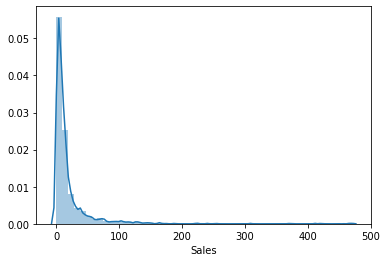

In [20]:
sns.distplot(df['Sales'])

## Distribution of Profits in dataset

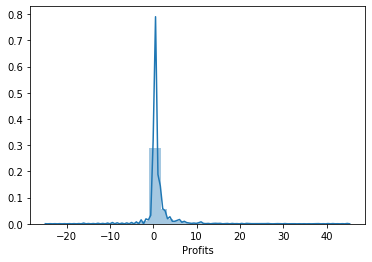

In [23]:
sns.distplot(df['Profits'])

## Distribution of Assets in dataset

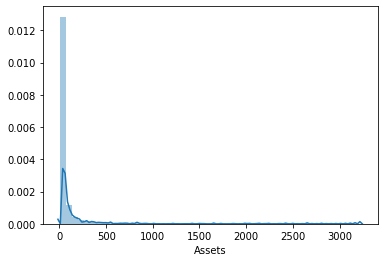

In [22]:
sns.distplot(df['Assets'])

## Distribution of Market Value in dataset

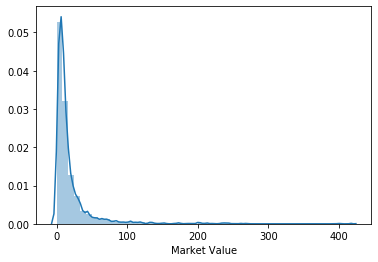

In [21]:
sns.distplot(df['Market Value'])

## Standard Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df3=sc.fit_transform(df2)

## Normalizing

In [12]:
from sklearn import preprocessing
df3= preprocessing.normalize(df3)

## Applying PCA

In [13]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
df3=pca.fit_transform(df3)
exp_var=pca.explained_variance_ratio_

In [14]:
print(exp_var)

[0.57637516 0.22564604]


# Applying Machine learning

## KMeans clustering

## Using the elbow method to find the optimal number of clusters

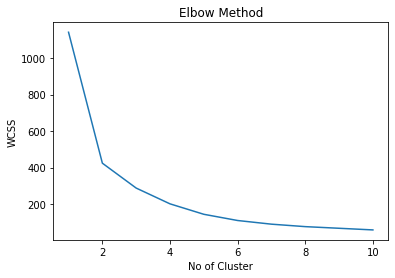

In [17]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
 kmeans = KMeans(n_clusters=i,init='k-means++',random_state=30)
 kmeans.fit(df3)
 wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel("No of Cluster")
plt.ylabel('WCSS')
plt.show()


## Training the K-Means model on the dataset

In [18]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=30)
y_kmeans = kmeans.fit_predict(df3)

In [19]:
y_kmeans


array([3, 3, 3, ..., 2, 2, 0])

## Visualising the clusters

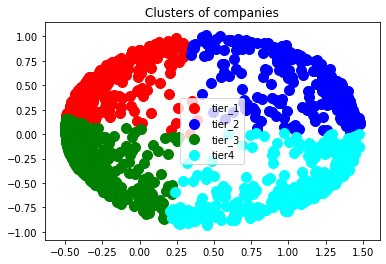

In [22]:
plt.scatter(df3[y_kmeans == 0, 0], df3[y_kmeans == 0, 1], s = 100, c = 'red', label = 'tier_1')
plt.scatter(df3[y_kmeans == 1, 0], df3[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'tier_2')
plt.scatter(df3[y_kmeans == 2, 0], df3[y_kmeans == 2, 1], s = 100, c = 'green', label = 'tier_3')
plt.scatter(df3[y_kmeans == 3, 0], df3[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'tier4')
plt.title('Clusters of companies')
plt.legend()
plt.show()


# Hierarchical clustering

## Using the Dedrogram method to find the optimal number of clusters

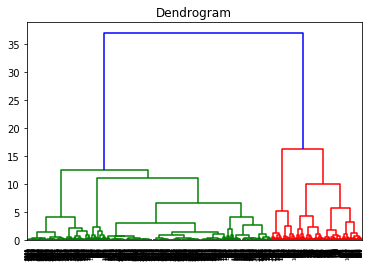

In [23]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df3,method='ward'))
plt.title('Dendrogram')
plt.show()


## Training the AgglomerativeClustering model on the dataset

In [24]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(df3)

In [25]:
y_hc


array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

## Visualising the clusters

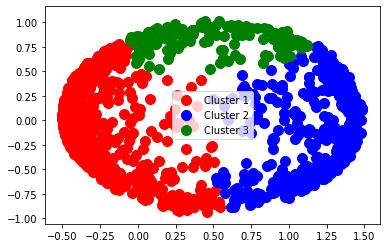

In [28]:
plt.scatter(df3[y_hc == 0, 0], df3[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(df3[y_hc == 1, 0], df3[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(df3[y_hc == 2, 0], df3[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(df3[y_hc == 3, 0], df3[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

plt.legend()
plt.show()
